In [5]:
%matplotlib inline

In [6]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

In [7]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = 'training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
training_idx = np.random.randint(4,64,1)
print(training_idx)

[58]


In [8]:
for idx in training_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        filename3 = "csa_"+str(idx)+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(idx)+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_directed_sd(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_directed_sd(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_directed_sd(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_directed_sd(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])





for i in labels:
    i[0] = int(i[0])

print(labels)
# A dataset with 80 samples, each graph is
# of size [10, 20]
#dataset = MiniGCDataset(80, 10, 20)
#print(dataset[0])

[[1], [0], [2], [3]]


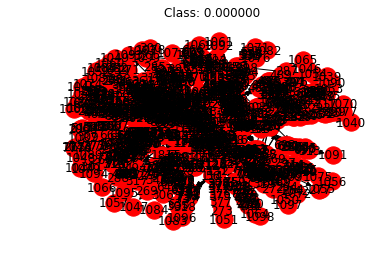

In [9]:
graph = trainset[1]
label=labels[1][0]

fig, ax = plt.subplots()
G=graph.to_networkx()
pos=nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos, ax=ax)
ax.set_title('Class: {:f}'.format(label))
plt.show()

### Apply random shuffle to training set

In [10]:
##apply random shuffle on the trainset    
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [11]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [12]:
import dgl.function as fn
import torch
import torch.nn as nn


# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

Readout and classification
--------------------------
For this demonstration, consider initial node features to be their degrees.
After two rounds of graph convolution, perform a graph readout by averaging
over all node features for each graph in the batch.

\begin{align}h_g=\frac{1}{|\mathcal{V}|}\sum_{v\in\mathcal{V}}h_{v}\end{align}

In DGL, :func:`dgl.mean_nodes` handles this task for a batch of
graphs with variable size. You then feed the graph representations into a
classifier with one linear layer to obtain pre-softmax logits.



In [13]:
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

Setup and training
------------------
Create a synthetic dataset of $400$ graphs with $10$ ~
$20$ nodes. $320$ graphs constitute a training set and
$80$ graphs constitute a test set.



In [14]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
# trainset = MiniGCDataset(320, 10, 20)
# testset = MiniGCDataset(80, 10, 20)
#print(trainset)

In [15]:
# Use PyTorch's DataLoader and the collate function
# defined before.
#data_loader = DataLoader(trainset, batch_size=2, shuffle=True,
#                         collate_fn=collate)
#print(data_loader)
# Create model
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []
for epoch in range(150):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    
    if (epoch%5==0):
        model.eval()
        eval_bg = dgl.batch(trainset_shuffled)
        eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
        probs_Y = torch.softmax(model(eval_bg), 1)
        argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

        print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
            (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 1.5972
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 1, loss 1.4350
Epoch 2, loss 1.4027
Epoch 3, loss 1.3884
Epoch 4, loss 1.3838
Epoch 5, loss 1.3839
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 6, loss 1.3853
Epoch 7, loss 1.3867


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 8, loss 1.3875
Epoch 9, loss 1.3875
Epoch 10, loss 1.3871
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 11, loss 1.3862
Epoch 12, loss 1.3850
Epoch 13, loss 1.3835
Epoch 14, loss 1.3820
Epoch 15, loss 1.3803
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 16, loss 1.3790
Epoch 17, loss 1.3776
Epoch 18, loss 1.3764
Epoch 19, loss 1.3749
Epoch 20, loss 1.3740
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 21, loss 1.3729
Epoch 22, loss 1.3716
Epoch 23, loss 1.3704
Epoch 24, loss 1.3691
Epoch 25, loss 1.3679
Accuracy of argmax predictions on the test set: 25.000000%
Epoch 26, loss 1.3667
Epoch 27, loss 1.3656
Epoch 28, loss 1.3643
Epoch 29, loss 1.3632
Epoch 30, loss 1.3618
Accuracy of argmax predictions on the test set: 50.000000%
Epoch 31, loss 1.3613
Epoch 32, loss 1.3592
Epoch 33, loss 1.3577
Epoch 34, loss 1.3564
Epoch 35, loss 1.3546
Accuracy of argmax predictions on the test set: 50.000000%
Epoch 36, loss 1.3533
Epoch 37, 

The learning curve of a run is presented below.



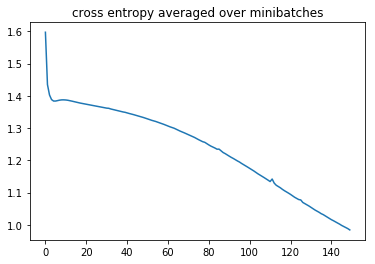

In [16]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

The trained model is evaluated on the test set created. To deploy
the tutorial, restrict the running time to get a higher
accuracy ($80$ % ~ $90$ %) than the ones printed below.



In [17]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

### Get Testset data

In [18]:
testset = []
test_labels = []
test_dir = 'test_data'

testing_idx=[]
for i in range(4,65):
    if i not in training_idx:
        testing_idx.append(i)

print(testing_idx)
print(training_idx)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64]
[58]


In [19]:
for idx in testing_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        filename3 = "csa_"+str(idx)+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(idx)+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_directed_sd(node_list,edge_list)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_directed_sd(node_list2,edge_list2)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_directed_sd(node_list3,edge_list3)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_directed_sd(node_list4,edge_list4)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

print(test_labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3],

In [20]:
##apply random shuffle on the testset    
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

In [21]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)


sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_labels == argmax_Y.float()).sum().item() / len(test_labels) * 100))

Accuracy of sampled predictions on the test set: 36.6667%
Accuracy of argmax predictions on the test set: 72.916667%


In [22]:
zip(model(test_bg),(test_labels))
for i1,i2 in zip(probs_Y,(test_labels)):
    argmax_Y = torch.max(i1).view(-1, 1)
    print(argmax_Y)
    print(i1,i2)
# print(torch.max(probs_Y, 1))

tensor([[0.3353]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.1398, 0.2543, 0.3353, 0.2706], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([[0.2974]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.1322, 0.2868, 0.2974, 0.2836], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([[0.3153]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.1058, 0.3153, 0.2844, 0.2945], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([[0.6136]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.6136, 0.0971, 0.1651, 0.1242], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([[0.3161]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.1045, 0.3161, 0.2845, 0.2948], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([[0.3007]], device='cuda:0', grad_fn=<ViewBackward>)
tensor([0.1117, 0.2984, 0.3007, 0.2

In [23]:
import tsne

#m = trainset[0].adjacency_matrix()
m = model(test_bg).cpu().data.numpy()


In [24]:
Y = tsne.tsne(m, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 240...
Mean value of sigma: 0.087545
Iteration 10: error is 10.141222
Iteration 20: error is 8.789930
Iteration 30: error is 8.698519
Iteration 40: error is 8.479848
Iteration 50: error is 8.536073
Iteration 60: error is 8.437003
Iteration 70: error is 8.531723
Iteration 80: error is 8.284990
Iteration 90: error is 8.274243
Iteration 100: error is 8.215451
Iteration 110: error is 0.490105
Iteration 120: error is 0.299581
Iteration 130: error is 0.169890
Iteration 140: error is 0.130077
Iteration 150: error is 0.119797
Iteration 160: error is 0.115388
Iteration 170: error is 0.111842
Iteration 180: error is 0.108683
Iteration 190: error is 0.106398
Iteration 200: error is 0.104733
Iteration 210: error is 0.103476
Iteration 220: error is 0.102569
Iteration 230: error is 0.101818
Iteration 240: error is 0.101188
Iteration 250: error is 0.100642
Iteration 260: error is 0.100191
Iteration 2

In [25]:
print(Y)

[[-2.63801295e+00  1.18484994e+01]
 [ 3.73506540e+00  6.58334260e+00]
 [ 1.47756458e+01  9.77789868e-01]
 [-2.11256805e+01 -1.74934279e+01]
 [ 1.50737819e+01  7.37420090e-01]
 [ 1.12202194e+01  5.52423433e+00]
 [ 8.75279224e+00  5.40900409e+00]
 [-3.75187622e+00  7.20868926e+00]
 [ 9.88808639e+00  5.77958737e+00]
 [ 2.58494712e+00  7.02033862e+00]
 [ 7.26379599e+00  5.75073822e+00]
 [-2.33737759e+00  1.29247257e+01]
 [ 1.94562958e+01 -3.29918933e+00]
 [-3.88155331e-01  1.61563057e+01]
 [-2.50908956e+00  7.61375832e+00]
 [ 1.91719121e+01 -2.95013192e+00]
 [ 1.11514409e+01  5.14035398e+00]
 [ 2.03296353e+01 -3.96714228e+00]
 [ 1.65072366e+01 -4.25944153e-01]
 [-2.44393098e+00  1.26086344e+01]
 [ 2.05491662e+01 -3.16288098e+00]
 [ 9.83803301e+00  5.15724767e+00]
 [ 9.83801889e+00  5.15722366e+00]
 [ 8.78478471e+00  5.71066769e+00]
 [-2.50912130e+00  7.61401439e+00]
 [-2.16695181e+01 -1.77157775e+01]
 [-2.07017718e+00  1.34207603e+01]
 [ 1.84626081e+01 -1.88111473e+00]
 [-2.03146821e+01 -1

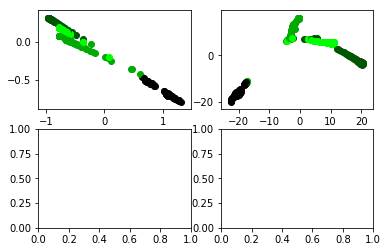

In [26]:
fig, axs = plt.subplots(2,2)


color = test_labels.cpu()*85/255
for i in range (len(test_labels)):
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
    

    
plt.show()